# Generating Total Data Frame for Main

### Import packages and load file

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.formula.api as smf
# from stargazer.stargazer import Stargazer


pd.set_option('Display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### ★ Disagreement Data from Cookson and Neissner (2020) JF

In [16]:
raw = pd.read_stata("../CooksonNiessner2020_Disagree.dta")
raw.head(3)
raw.shape

(2651379, 5)

In [17]:
np.mean(raw['dis_all']), np.mean(raw['dis_within_group']), np.mean(raw['dis_across_group'])

(0.2530520558357239, 0.014839296229183674, 0.011729910038411617)

In [18]:
permno_seq = raw['permno'].unique()
permno_seq.shape

(6056,)

In [19]:
index_raw = raw['permno'].value_counts()
index = index_raw.index[0:100].to_series().reset_index(drop=True)
index.tail()

95   90049.00000
96   86444.00000
97   82567.00000
98   11891.00000
99   60628.00000
dtype: float64

In [20]:
raw_top = raw.loc[raw['permno'].isin(index)]
raw_top.sort_values('date')

,permno,date,dis_all,dis_within_group,dis_across_group
60535,86868.00000,2010-01-01,0.00000,0.00000,0.00000
10839,84788.00000,2010-01-01,0.00000,0.00000,0.00000
15777,14593.00000,2010-01-01,0.00000,0.00000,0.00000
27043,38703.00000,2010-01-01,0.00000,0.00000,0.00000
34015,90448.00000,2010-01-01,0.00000,0.00000,0.00000
...,...,...,...,...,...
2339455,78877.00000,2018-12-31,0.75993,0.28289,0.44745
2550486,14593.00000,2018-12-31,0.99175,0.91858,0.39661
2583895,77274.00000,2018-12-31,0.94281,0.00000,0.00000
2499753,85914.00000,2018-12-31,0.00000,0.00000,0.00000


In [21]:
raw_top.groupby('date').mean()

,permno,dis_all,dis_within_group,dis_across_group
date,,,,
2010-01-01,66633.00000,0.00000,0.00000,0.00000
2010-01-02,66605.08333,0.08333,0.00000,0.00000
2010-01-03,65914.43750,0.29103,0.00000,0.00000
2010-01-04,67574.05882,0.40769,0.00000,0.00000
2010-01-05,68289.08621,0.49477,0.01026,0.00515
...,...,...,...,...
2018-12-27,64601.47674,0.72629,0.09107,0.06358
2018-12-28,63695.87640,0.70547,0.10328,0.04946
2018-12-29,64604.68966,0.39528,0.02747,0.02793


In [9]:
raw_group = raw_top.groupby('date').mean()
dis = raw_group['dis_all']
dis.name = 'dis'
dis

date
2010-01-01   0.00000
2010-01-02   0.08333
2010-01-03   0.29103
2010-01-04   0.40769
2010-01-05   0.49477
               ...  
2018-12-27   0.72629
2018-12-28   0.70547
2018-12-29   0.39528
2018-12-30   0.38501
2018-12-31   0.52012
Name: dis, Length: 3287, dtype: float32

In [10]:
np.mean(dis)

0.5315358638763428

### ★ Twitter Sentiment Index

In [2]:
twitter = pd.read_csv("./sent_score_0603.csv")
twitter

,Date,Score
0,2019-01-01,-0.03356
1,2019-01-02,0.00074
2,2019-01-03,-0.10319
3,2019-01-04,0.23895
4,2019-01-05,-0.07275
...,...,...
1356,2022-09-26,0.01442
1357,2022-09-27,-0.00011
1358,2022-09-28,0.08271
1359,2022-09-29,-0.03480


In [3]:
twitter['Score'].mean()

0.07761321370635761

In [4]:
# twitter = pd.read_csv("../sent_score.csv")
# twitter = twitter.dropna()
twitter['Date'] = pd.to_datetime(twitter['Date'].astype("string")).dt.to_period('d')
twitter = twitter.set_index('Date').to_timestamp()

# Match Time Step
twitter = twitter.shift(-1)
twitter.head()

,Score
Date,
2019-01-01,0.00074
2019-01-02,-0.10319
2019-01-03,0.23895
2019-01-04,-0.07275
2019-01-05,0.13102


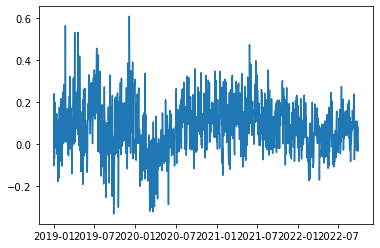

In [5]:
plt.plot(twitter)

### ★ Google Trend Data

In [22]:
google_df = pd.read_csv("../google_trend_update_short_0516.csv")
google_df['date'] = pd.to_datetime(google_df['date'].astype("string")).dt.to_period('d')
google_df = google_df.set_index('date').to_timestamp()
google_df.columns = ['google_1', 'google_2', 'google_3', 'google_4', 'google_5', 'google_6']

### ★ News Sentiment Index

### ★ VIX, SPY, OIL, DJI, MSCI

In [10]:
st_year, st_month, st_date = 2010, 1, 1
ed_year, ed_month, ed_date = 2018, 12, 31

date_range = pd.date_range(datetime(st_year, st_month, st_date), datetime(ed_year, ed_month, ed_date))
date_range.shape

(3287,)

In [29]:
import yfinance as yf

vix_ticker = ['^VIX']

vix = yf.download(vix_ticker, start = "2010-01-01", end = "2022-12-31")
vix.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,22.17000,22.64000,20.78000,20.87000,20.87000,0
2022-12-27,21.67000,22.80000,21.59000,21.65000,21.65000,0
2022-12-28,21.47000,22.26000,20.96000,22.14000,22.14000,0
2022-12-29,22.25000,22.31000,21.36000,21.44000,21.44000,0
2022-12-30,21.83000,22.40000,21.59000,21.67000,21.67000,0


In [30]:
tickers = ["^GSPC", "CL=F","^DJI","MSCI"]

multpl_stocks = yf.download(tickers, start = "2010-01-01", end = "2022-12-31")
multpl_stocks.tail(3)

[*********************100%***********************]  4 of 4 completed


Adj Close                                     Close            \
                CL=F      MSCI        ^DJI      ^GSPC     CL=F      MSCI   
Date                                                                       
2022-12-28  78.96000 452.01996 32875.71094 3783.21997 78.96000 454.44000   
2022-12-29  78.40000 469.40689 33220.80078 3849.28003 78.40000 471.92001   
2022-12-30  80.26000 462.69284 33147.25000 3839.50000 80.26000 465.17001   

                                      High                                   \
                  ^DJI      ^GSPC     CL=F      MSCI        ^DJI      ^GSPC   
Date                                                                          
2022-12-28 32875.71094 3783.21997 79.92000 464.50000 33379.55078 3848.32007   
2022-12-29 33220.80078 3849.28003 78.82000 473.42001 33293.42188 3858.18994   
2022-12-30 33147.25000 3839.50000 80.67000 469.42999 33152.55078 3839.85010   

                Low                                      Open            \
               CL=F      MSCI        ^DJI      ^GSPC     CL=F      MSCI   
Date                                                                      
2022-12-28 77.30000 453.94000 32869.14844 3780.78003 79.89000 460.59000   
2022-12-29 76.79000 458.50000 33020.35156 3805.44995 78.82000 460.13000   
2022-12-30 77.71000 459.48999 32847.82031 3800.34009 78.73000 466.34000   

                                        Volume                               \
                  ^DJI      ^GSPC         CL=F         MSCI            ^DJI   
Date                                                                          
2022-12-28 33264.76172 3829.56006 207717.00000 211000.00000 252260000.00000   
2022-12-29 33021.42969 3805.44995 199858.00000 272500.00000 243060000.00000   
2022-12-30 33121.60938 3829.06006 205909.00000 354400.00000 295500000.00000   

                             
                      ^GSPC  
Date                         
2022-12-28 3083520000.00000  
2022-12-29 3003680000.00000  
2022-12-30 2979870000.00000

In [31]:
df_stock = np.log(multpl_stocks['Adj Close']).pct_change().dropna()
df_vix = np.log(vix['Adj Close'])

In [ ]:
df_adj = pd.concat([df_vix, df_stock], axis = 1).dropna()
df_adj.columns = ['VIX', 'CL=F', 'MSCI', '^DJI', '^GSPC']
df_adj.tail()

### ★ Other economic variables

In [33]:
import fredapi as fa

fred = fa.Fred(api_key='#####')

In [83]:
"""  Crude Oil Prices: West Texas Intermediate (WTI) """
oil = fred.get_series('DCOILWTICO', observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
oil.name = 'oil'
oil.tail(3)

2022-12-28   78.89000
2022-12-29   78.43000
2022-12-30   80.16000
Name: oil, dtype: float64

In [81]:
""" Dollar Index DXY """
dxy = fred.get_series('DTWEXBGS', observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
dxy.name = 'DXY'
dxy.tail(3)

2022-12-28   121.99830
2022-12-29   121.65560
2022-12-30   121.40470
Name: DXY, dtype: float64

In [78]:
""" Credit Spread """
credit = fred.get_series("BAMLH0A0HYM2", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
credit.name = 'credit'
credit.tail()

2022-12-27   4.55000
2022-12-28   4.77000
2022-12-29   4.81000
2022-12-30   4.79000
2022-12-31   4.81000
Name: credit, dtype: float64

In [80]:
""" 10 YR Treasury  """
term = fred.get_series("T10Y3M", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
term.name = 'term'
term.tail()

2022-12-23   -0.59000
2022-12-27   -0.62000
2022-12-28   -0.58000
2022-12-29   -0.62000
2022-12-30   -0.54000
Name: term, dtype: float64

In [85]:
""" FFDeviation  """
FF = pd.DataFrame(fred.get_series("FEDFUNDS", observation_start = "1/1/2010", observation_end = "12/31/2022")).dropna()
FF['date'] = FF.index
df_FF = pd.DataFrame(FF).reset_index(drop = True)
df_FF['date'] = pd.to_datetime(df_FF['date']).dt.to_period('m')
df_FF = df_FF.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
df_FF.columns = ['FF']
df_FF.tail()

,FF
date,
2022-12-27,4.10000
2022-12-28,4.10000
2022-12-29,4.10000
2022-12-30,4.10000
2022-12-31,4.10000


In [88]:
""" 1 Year T Bill Rate """

tbill = fred.get_series("DTB1YR", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
tbill.name = 'tbill'
tbill.head()

2010-01-04   0.41000
2010-01-05   0.37000
2010-01-06   0.36000
2010-01-07   0.36000
2010-01-08   0.33000
Name: tbill, dtype: float64

In [40]:
""" Fama-French EMR, SMB, HML, Short-term Reversal """

emr_raw = pd.read_csv("../data/F-F_Research_Data_5_Factors_2x3_daily.csv").dropna()
str_raw = pd.read_csv("../data/F-F_ST_Reversal_Factor_daily.csv").dropna()

# datetime.strptime(emr_raw['date'].astype("string"), '%Y%m%d')

emr_raw['date'] = pd.to_datetime(emr_raw['date'].astype("string")).dt.to_period('d') #strftime('%Y-%m-%d')
str_raw['date'] = pd.to_datetime(str_raw['date'].astype("string")).dt.to_period('d')

emr_raw = emr_raw.loc[:,['date','Mkt-RF','SMB','HML','RF']].set_index('date').to_timestamp()
str_raw = str_raw.set_index('date').to_timestamp()
emr_raw.tail()

,Mkt-RF,SMB,HML,RF
date,,,,
2023-03-27,0.27000,0.51000,1.02000,0.01600
2023-03-28,-0.17000,-0.03000,0.74000,0.01600
2023-03-29,1.39000,-0.34000,-0.50000,0.01600
2023-03-30,0.51000,-0.61000,-0.59000,0.01600
2023-03-31,1.53000,0.51000,-0.77000,0.01600


In [91]:
""" Spot Exchange rate EUR & CNY & GBP & JPY : Log return """

eur_raw = fred.get_series("DEXUSEU", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
eur = np.log(eur_raw).pct_change().dropna()
eur.name = 'eur'

cny_raw = fred.get_series("DEXCHUS", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
cny = np.log(cny_raw).pct_change().dropna()
cny.name = 'cny'

gbp_raw = fred.get_series("DEXUSUK", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
gbp = np.log(gbp_raw).pct_change().dropna()
gbp.name = 'gbp'

jpy_raw = fred.get_series("DEXJPUS", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
jpy = np.log(jpy_raw).pct_change().dropna()
jpy.name = 'jpy'


currency = pd.concat([eur, cny, gbp, jpy], axis=1)

In [94]:
""" Turnover Ratio : daily volume divided by total market capitalization """

cap = fred.get_series("WILL5000PRFC", observation_start = "1/1/2010", observation_end = "12/31/2022").dropna()
cap.name = 'cap'

vol = multpl_stocks['Volume'].loc[:,['^GSPC', "^DJI", "MSCI"]]

df_tr = pd.concat([vol, cap], axis = 1).dropna()
df_tr['GSPC_TR'] = df_tr['^GSPC']/(cap*100000)
df_tr['DJI_TR'] = df_tr['^DJI']/(cap*10000)
df_tr['MSCI_TR'] = df_tr['MSCI']/(cap*100)

df_tr_temp = df_tr.loc[:, ['GSPC_TR', 'DJI_TR','MSCI_TR']]
df_tr_temp["GSPC_TR_Change"] = np.log(df_tr_temp['GSPC_TR']).pct_change().dropna()
df_tr_temp["DJI_TR_Change"] = np.log(df_tr_temp['DJI_TR']).pct_change().dropna()
df_tr_temp["MSCI_TR_Change"] = np.log(df_tr_temp['MSCI_TR']).pct_change().dropna()

df_tr_use = df_tr_temp.dropna()
df_tr_use

,GSPC_TR,DJI_TR,MSCI_TR,GSPC_TR_Change,DJI_TR_Change,MSCI_TR_Change
2010-01-05,2.11223,1.59870,1.12810,-0.38825,0.10470,-1.13174
2010-01-06,4.21270,1.57608,1.61124,0.92325,-0.03038,2.95744
2010-01-07,4.44756,1.83440,1.89685,0.03772,0.33362,0.34211
2010-01-08,3.69205,1.45265,1.38620,-0.12475,-0.38458,-0.48989
2010-01-11,3.57438,1.52902,1.22506,-0.02480,0.13722,-0.37841
...,...,...,...,...,...,...
2022-12-23,0.73977,0.58002,0.09110,-7.99125,4.10466,0.01978
2022-12-27,0.79888,0.64856,0.10537,-0.25506,-0.20504,-0.06074
2022-12-28,0.82313,0.67340,0.05633,-0.13316,-0.08679,0.27835
2022-12-29,0.78714,0.63696,0.07141,0.22968,0.14067,-0.08250


In [95]:
""" CPI *** NO YEAR *** """ 

cpi_raw = pd.DataFrame(fred.get_series("CPIAUCSL", observation_start = "12/31/2009", observation_end = "12/31/2022")).dropna()
inf_M = np.log(cpi_raw).diff().dropna()
inf_M['date'] = inf_M.index
inf_M = pd.DataFrame(inf_M).reset_index(drop = True)
inf_M['date'] = pd.to_datetime(inf_M['date']).dt.to_period('m')
inf_M = inf_M.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
inf_M.columns = ['inf_M']

In [97]:
""" Consumer Sentiment Univ of Michigan """

sent_raw = pd.read_csv("../data/Consumer Sentiment Michigan.csv", sep=",")
sent_raw['date'] = pd.to_datetime(sent_raw[['Year','Month']].assign(day = 1)).dt.to_period('m')
sent_raw['Index'] = np.log(sent_raw['Index']).diff()
sent_temp = sent_raw.loc[:,['date','Index']].dropna()
sent_use = sent_temp.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
sent_use.columns = ['SentMichigan']

In [45]:
""" Money Supply : Monthly log-change in SA M1 money supply"""

m1_raw = pd.DataFrame(fred.get_series("M1SL", observation_start = "12/31/2009", observation_end = "12/31/2022"))
m1 = np.log(m1_raw).diff().dropna()
m1['date'] = m1.index
m1 = pd.DataFrame(m1).reset_index(drop = True)
m1['date'] = pd.to_datetime(m1['date']).dt.to_period('m')
m1 = m1.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
m1.columns = ['m1']

In [46]:
""" Housing : Monthly log-change in new private housing started """

house_raw = pd.DataFrame(fred.get_series("HOUST", observation_start = "12/31/2009", observation_end = "12/31/2022"))
house = np.log(house_raw).diff().dropna()
house['date'] = house.index
house = pd.DataFrame(house).reset_index(drop = True)
house['date'] = pd.to_datetime(house['date']).dt.to_period('m')
house = house.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
house.columns = ['house']

In [47]:
""" Industrial Production : Monthly log-difference in SA Industrial Production """

indus_raw = pd.DataFrame(fred.get_series("INDPRO", observation_start = "12/31/2009", observation_end = "12/31/2022"))
indus = np.log(indus_raw).diff().dropna()
indus['date'] = indus.index
indus = pd.DataFrame(indus).reset_index(drop = True)
indus['date'] = pd.to_datetime(indus['date']).dt.to_period('m')
indus = indus.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
indus.columns = ['indus']

In [48]:
""" New orders : Monthly log-change in SA New Orders - Manufacturers' New Orders: Durable Goods """

orders_raw = pd.DataFrame(fred.get_series("DGORDER", observation_start = "12/31/2009", observation_end = "12/31/2022"))
orders = np.log(orders_raw).diff().dropna()
orders['date'] = orders.index
orders = pd.DataFrame(orders).reset_index(drop = True)
orders['date'] = pd.to_datetime(orders['date']).dt.to_period('m')
orders = orders.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
orders.columns = ['orders']

In [49]:
""" CRB INDEX """

crb_raw = pd.read_csv("../data/CRB Index.csv", sep=",")

crb_raw['Date'] = pd.to_datetime(crb_raw['Date']).dt.to_period('d')
crb_temp = crb_raw.loc[:,['Date','Close']].set_index('Date').to_timestamp()
crb_use = crb_temp.pct_change().dropna()
crb_use.columns = ['crb']
crb_use.tail()

,crb
Date,
2022-10-03,0.01687
2022-10-04,0.02791
2022-10-05,0.00521
2022-10-06,0.00130
2022-10-07,0.01189


In [50]:
""" Capaticity Utilization Level & Change """

capa_raw = pd.DataFrame(fred.get_series("TCU", observation_start = "12/31/2009", observation_end = "12/31/2022"))

capa_level = capa_raw.copy()
capa_level['date'] = capa_level.index
capa_level = pd.DataFrame(capa_level).reset_index(drop = True)
capa_level['date'] = pd.to_datetime(capa_level['date']).dt.to_period('m')
capa_level = capa_level.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
capa_level.columns = ['capa_level']

capa_change = np.log(capa_raw).diff().dropna()
capa_change['date'] = capa_change.index
capa_change = pd.DataFrame(capa_change).reset_index(drop = True)
capa_change['date'] = pd.to_datetime(capa_change['date']).dt.to_period('m')
capa_change = capa_change.set_index('date').resample('D').interpolate(method='linear').to_timestamp()
capa_change.columns = ['capa_change']


### ★ HAR Variables (1 day, 5 days, 22 days)

In [52]:
vix_raw = df_adj['VIX']
vix_raw

Date
2010-01-05   2.96269
2010-01-06   2.95282
2010-01-07   2.94759
2010-01-08   2.89757
2010-01-11   2.86505
               ...  
2022-12-23   3.03831
2022-12-27   3.07501
2022-12-28   3.09739
2022-12-29   3.06526
2022-12-30   3.07593
Name: VIX, Length: 3271, dtype: float64

In [101]:
vix_d_x = vix_raw[0:(len(vix_raw))]

vix_w_x = []
vix_m_x = []

for j in range(23,(len(vix_raw))):
    vix_w_temp = sum(vix_d_x[(j-5):(j)]) / 5
    vix_m_temp = sum(vix_d_x[(j-22):(j)]) / 22
    
    vix_w_x.append(vix_w_temp)
    vix_m_x.append(vix_m_temp)
    
vix_w_x = pd.DataFrame(vix_w_x)
vix_m_x = pd.DataFrame(vix_m_x)

df_vix = pd.concat([vix_d_x[22:len(vix_raw)].reset_index(drop=True), 
                    vix_w_x[0:len(vix_raw)].reset_index(drop=True),
                    vix_m_x[0:len(vix_raw)].reset_index(drop=True)
                    ], axis = 1, ignore_index=True)

df_vix.columns = ['VIX_D_X', 'VIX_W_X', 'VIX_M_X']

In [102]:
""" DATE t+1 """
date = vix_d_x[22:len(vix_raw)].index
# date = vix_d_y[22:len(vix_raw)].index
df_vix.index = date
df_vix

,VIX_D_X,VIX_W_X,VIX_M_X
Date,,,
2010-02-05,3.26232,3.15616,3.05170
2010-02-08,3.27752,3.18816,3.06646
2010-02-09,3.25810,3.22636,3.08057
2010-02-10,3.23475,3.25877,3.09590
2010-02-11,3.17639,3.24181,3.11005
...,...,...,...
2022-12-23,3.03831,3.06086,3.07280
2022-12-27,3.07501,3.05387,3.07562
2022-12-28,3.09739,3.05992,3.07912


### ★ Generating Final Dataframe 

In [132]:
""" FINAL DATAFRAME WITH ALL VARIABLES """

df_final = pd.concat([df_vix,
        #    dis.loc[dis.index.isin(date)],
           twitter.loc[twitter.index.isin(date)],
           google_df.loc[google_df.index.isin(date)],
           df_adj.loc[df_adj.index.isin(date),['^GSPC','CL=F','^DJI',"MSCI"]], 
           oil.loc[oil.index.isin(date)], 
           dxy.loc[dxy.index.isin(date)], 
           credit.loc[credit.index.isin(date)], 
           term.loc[term.index.isin(date)], 
           df_FF.loc[df_FF.index.isin(date)],
           emr_raw.loc[emr_raw.index.isin(date)],
           str_raw.loc[str_raw.index.isin(date)],
           tbill.loc[tbill.index.isin(date)],
           currency.loc[currency.index.isin(date)],
           df_tr_use.loc[df_tr_use.index.isin(date)],
           inf_M.loc[inf_M.index.isin(date)],
           sent_use.loc[sent_use.index.isin(date)],
           m1.loc[m1.index.isin(date)],
           house.loc[house.index.isin(date)],
           indus.loc[indus.index.isin(date)],
           orders.loc[orders.index.isin(date)],
           crb_use.loc[crb_use.index.isin(date)],
           capa_level.loc[capa_level.index.isin(date)],
           capa_change.loc[capa_change.index.isin(date)]
           ], axis = 1).replace([np.inf, -np.inf], np.nan, inplace = False).dropna()

### ★ Save Final Dataframe

In [135]:
writer = pd.ExcelWriter('./data_womacro_test.xlsx'
                        , engine = 'xlsxwriter'
                        , date_format= 'yyyy-mm-dd'
                        , datetime_format= 'yyyy-mm-dd')

df_final.to_excel(writer, index = True, sheet_name = 'Data')

writer.book.use_zip64()
writer.save()